## 1. 
Load the dataset in the file named winequality_white.csv and produce at least one
table and one graph that summarize the dataset statistics. Set up a classification
problem: predicting the quality value (a single variable with seven classes labeled
3, 4, 5, …, 9) based on the values of all the other variables in the file (acidity,
alcohol, pH, etc.) and split the dataset into separate training and test sets in a
reproducible way;

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('winequality-white.csv', sep=',') # Update this if the file has a different delimiter

# Display first few rows of the dataset
print(df.head())

# Display dataset statistics
print(df.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

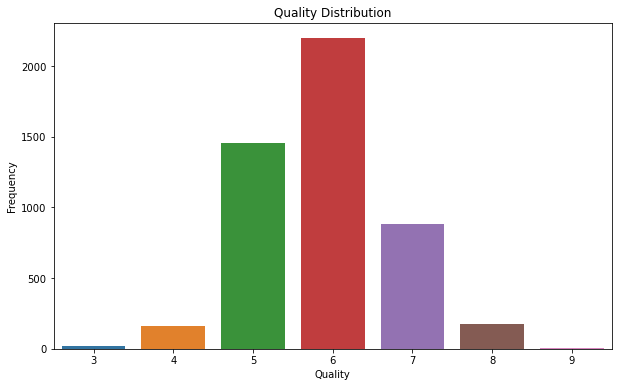

In [3]:
# Plot histogram of the 'quality' column
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df)
plt.title('Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

In [4]:
# Set up classification problem: predicting the quality value
X = df.drop('quality', axis=1)
y = df['quality']

# Split the dataset into training and test sets in a reproducible way
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. 
Train two models to solve this classification problem: one based on Decision Trees
(e.g., DecisionTreeClassifier, RandomForestClassifier) and one based on SVMs
(e.g., an SVC with your choice of kernel). Use the training set you created in part
1 to cross-validate the performance of each model. Report statistics for the scoring
method of your choice (e.g., accuracy, weighted precision, macro recall, f1 score); 

In [5]:
# Train Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f'Decision Tree CV Accuracy: {np.mean(dt_cv_scores)}')

# Train Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f'Random Forest CV Accuracy: {np.mean(rf_cv_scores)}')

# Train SVM model
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
svm_cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f'SVM CV Accuracy: {np.mean(svm_cv_scores)}')

Decision Tree CV Accuracy: 0.5821806500377928
Random Forest CV Accuracy: 0.6602822738290719
SVM CV Accuracy: 0.45073859045533915


## 3. 
Use GridSearchCV() and the training dataset from part 1 to tune the Decision Tree
family model from part 2; compare its performance when changing at least two
different hyperparameters (e.g., tree depth) across a range of values.

In [6]:
# Hyperparameter tuning using GridSearchCV for Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20]
}
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f'Best parameters for Decision Tree: {grid_search.best_params_}')
print(f'Best CV Accuracy for Decision Tree: {grid_search.best_score_}')


Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}
Best CV Accuracy for Decision Tree: 0.5821806500377928


## 4. 
Use the make_pipeline() method and the training dataset from part 1 to study and
describe the impact of data transformations on the performance of the SVM family
model from part 2. You can try dimension reduction (e.g., using different
n_component values for PCA) and/or data scaling (e.g., MinMaxScaler). 

In [7]:
# Study the impact of data transformations on SVM performance using make_pipeline
pipeline = make_pipeline(StandardScaler(), PCA(n_components=8), SVC(random_state=42))
pipeline.fit(X_train, y_train)
pipeline_cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f'SVM with PCA and scaling CV Accuracy: {np.mean(pipeline_cv_scores)}')

SVM with PCA and scaling CV Accuracy: 0.5612586988818516


## 5. 
Train the DummyClassifier() on your training set. Use your test set to compare the
performance of this DummyClassifier() and the best model versions from parts 3
and 4. Discuss your overall results. 

In [8]:
# Train DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_classifier.fit(X_train, y_train)
dummy_cv_scores = cross_val_score(dummy_classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f'Dummy Classifier CV Accuracy: {np.mean(dummy_cv_scores)}')

Dummy Classifier CV Accuracy: 0.4507402194594313


In [9]:
# Evaluate models on the test set
best_dt = grid_search.best_estimator_
best_dt_pred = best_dt.predict(X_test)
pipeline_pred = pipeline.predict(X_test)
dummy_pred = dummy_classifier.predict(X_test)

In [10]:
print("Decision Tree Test Accuracy:", accuracy_score(y_test, best_dt_pred))
print("SVM with PCA and Scaling Test Accuracy:", accuracy_score(y_test, pipeline_pred))
print("Dummy Classifier Test Accuracy:", accuracy_score(y_test, dummy_pred))

print("\nDecision Tree Classification Report:\n", classification_report(y_test, best_dt_pred))
print("\nSVM with PCA and Scaling Classification Report:\n", classification_report(y_test, pipeline_pred))
print("\nDummy Classifier Classification Report:\n", classification_report(y_test, dummy_pred))

Decision Tree Test Accuracy: 0.6061224489795919
SVM with PCA and Scaling Test Accuracy: 0.5469387755102041
Dummy Classifier Test Accuracy: 0.44081632653061226

Decision Tree Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.24      0.28      0.26        25
           5       0.66      0.64      0.65       291
           6       0.64      0.63      0.63       432
           7       0.61      0.59      0.60       192
           8       0.31      0.49      0.38        35
           9       0.00      0.00      0.00         0

    accuracy                           0.61       980
   macro avg       0.35      0.37      0.36       980
weighted avg       0.61      0.61      0.61       980


SVM with PCA and Scaling Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.50      0.08      0.14   

/project/dsi/apps/anaconda3/python-3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

# Discussion

## Decision Tree Model
The Decision Tree classifier achieved a test accuracy of approximately 60.6%. The model's precision and recall vary significantly across different classes. Classes 5 and 6, being the most frequent, have relatively high precision and recall, with F1-scores around 0.65 and 0.63, respectively. Classes 3, 7, and 8 perform worse, with low precision and recall. The model's ability to handle the majority class well is evident, but it struggles with less frequent classes, indicating a need for improvement in handling class imbalance.

## SVM with PCA and Scaling
The SVM model with PCA and scaling showed a test accuracy of 54.7%. This model's performance is slightly below the Decision Tree. It has decent precision and recall for class 6, but other classes, especially 4 and 7, have poor performance. The macro and weighted averages of precision, recall, and F1-score are lower compared to the Decision Tree, highlighting that while the model captures some patterns, it fails to generalize well across all classes, especially the minority ones.

## Dummy Classifier
The Dummy Classifier's test accuracy is 44.1%, serving as a baseline model. It only predicts the most frequent class (class 6) with 100% recall, but fails to capture any information from the other classes, resulting in zero precision and recall for them. The macro average F1-score is very low, indicating that this model is not useful for predicting the wine quality, as it merely guesses the most common class without any meaningful insights.

## Summary
In summary, the Decision Tree outperforms the SVM with PCA and scaling and the Dummy Classifier. The Decision Tree's accuracy is significantly higher, but both models struggle with less frequent classes. The Dummy Classifier highlights the importance of model sophistication, as it merely predicts the majority class without learning any patterns. Further improvements in handling class imbalance and tuning model parameters could enhance performance across all classes.